In [1]:
# 데이터 분석에 필요한 라이브러리 추가
import numpy as np
import pandas as pd

# tensorflow 라이브러리 추가
import tensorflow as tf

# visualization 라이브러리 추가
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import train and test CSV file 읽어오기
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

# 읽어온 데이터의 어떤 값들이 들어있는지 보기
print(train.columns)
print(test.columns)

# 샘플로 찍어보자 
train.sample(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S


Percentage of females who survived: 74.2038216561
Percentage of males who survived: 18.8908145581


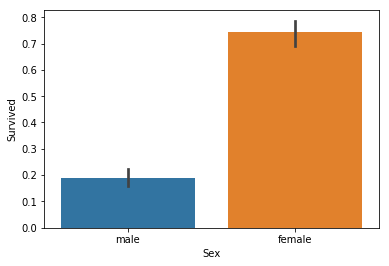

In [3]:
# 성별이 생존의 미치는 영향에 대해서 확인
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

# 성별은 있는 그대로여도 의미 있는 데이터 일듯하여 가공 없이 사용하기로 결정

Percentage of Pclass = 1 who survived: 62.962962963
Percentage of Pclass = 2 who survived: 47.2826086957
Percentage of Pclass = 3 who survived: 24.2362525458


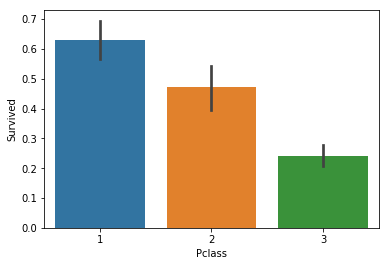

In [4]:
# Pclass 생존의 미치는 영향에 대해서 확인
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

# Pclass 역시 있는 그대로여도 의미 있는 데이터 일듯하여 가공 없이 사용하기로 결정

In [5]:
# 이름은 생존 여부에 전혀 관계가 없을 것 같다 (개인적인 생각)
# 따라서 Drop 해 본다
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

train.sample(5)

# 케글의 다른 커널 들에서는 이름의 작위를 분석해서 나이 부분을 채워준 커널이 많이 있다
# 나중에 검토해서 추가 해 보자

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
156,157,1,3,female,16.0,0,0,35851,7.7333,NaN,Q
382,383,0,3,male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C
344,345,0,2,male,36.0,0,0,229236,13.0000,NaN,S
103,104,0,3,male,33.0,0,0,7540,8.6542,NaN,S


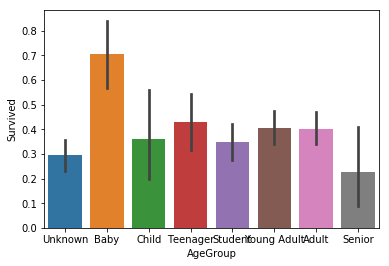

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
438,439,0,1,male,64.0,1,4,19950,263.00,C23 C25 C27,S,Senior
624,625,0,3,male,21.0,0,0,54636,16.10,NaN,S,Student
674,675,0,2,male,-0.5,0,0,239856,0.00,NaN,S,Unknown
214,215,0,3,male,-0.5,1,0,367229,7.75,NaN,Q,Unknown
452,453,0,1,male,30.0,0,0,113051,27.75,C111,C,Young Adult


In [6]:
# 이름이 생존의 미치는 영향에 대해서 확인
# 이름엔 데이터 값이 없는 행이 존재 한다.
# 채워줘 본다
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

# 나이는 있는 그대로는 의미가 없어, 그룹으로 묶어 본다.
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

#see a sample of the dataset to get an idea of the variables
train.sample(5)

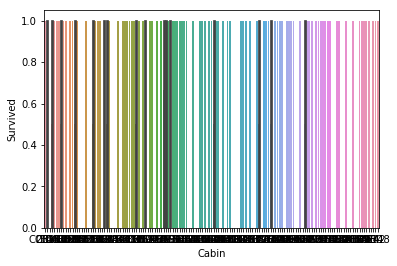

In [7]:
#draw a bar plot of survival by Cabin
sns.barplot(x="Cabin", y="Survived", data=train)

# 이대로는 의미 없는 데이터 일듯 가공이 필요해 보인다.

Percentage of CabinBool = 1 who survived: 66.6666666667
Percentage of CabinBool = 0 who survived: 29.9854439592


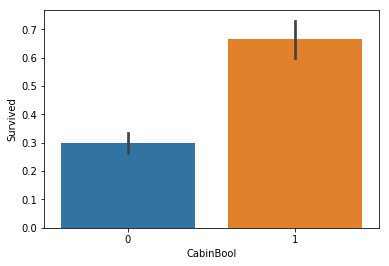

In [8]:
# 커널 참조해서 Cabin 값 NULL 여부로 분류해서 표시해 본다

train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

# 사용해도 좋을 것 같아 보인다. 일단 사용해본다

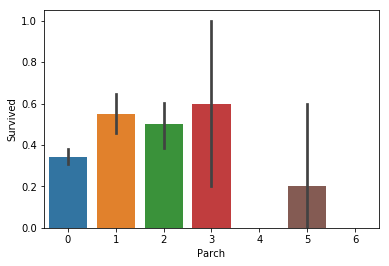

In [9]:
# Parch이 생존의 미치는 영향에 대해서 확인
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

# 일단 그대로 사용해 보고 향후 3 이상과 이하로 나눠서 그룹핑 해 보려한다

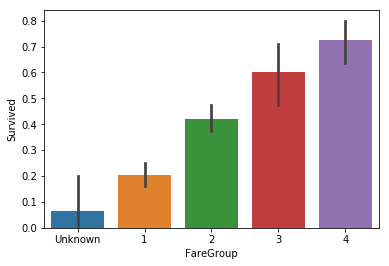

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
48,49,0,3,male,-0.5,2,0,2662,21.6792,NaN,C,Unknown,0,2
302,303,0,3,male,19.0,0,0,LINE,0.0000,NaN,S,Student,0,Unknown
555,556,0,1,male,62.0,0,0,113807,26.5500,NaN,S,Senior,0,2
125,126,1,3,male,12.0,1,0,2651,11.2417,NaN,C,Child,0,2
630,631,1,1,male,80.0,0,0,27042,30.0000,A23,S,Senior,1,2


In [10]:
# 운임은 어느 정도 부유 척도에 영향이 있을듯한데, 그대로 쓰기는 힘들어 
# 그룹핑을 해본다

#sort the ages into logical categories
train["Fare"] = train["Fare"].fillna(-0.5)
test["Fare"] = test["Fare"].fillna(-0.5)

bins = [-1, 0, 10, 50, 70, np.inf]
labels = ['Unknown', '1', '2', '3', '4']

train['FareGroup'] = pd.cut(train["Fare"], bins, labels = labels)
test['FareGroup'] = pd.cut(test["Fare"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="FareGroup", y="Survived", data=train)
plt.show()


# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

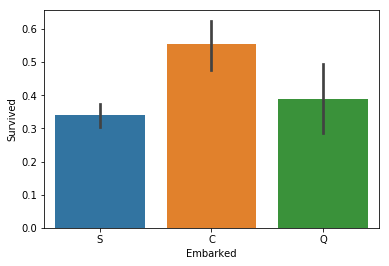

In [11]:
# 승선지에 따른 생존 여부 표시
train["Embarked"] = train["Embarked"].fillna("S")
test["Embarked"] = test["Embarked"].fillna("S")

sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

# 유의미 한지는 조금 더 고민해 보자
# 일반적으로는 승선지가 생존 여부에는 관계가 없을 것 같다

In [12]:
# 변경해 본 트레이닝 셋을 저장해 보자 
train.to_csv('remake_blackrains.csv', index=False)

In [13]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
AgeGroup         0
CabinBool        0
FareGroup        0
dtype: int64


In [14]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
AgeGroup         0
CabinBool        0
FareGroup        0
dtype: int64


In [15]:
#create a combined group of both datasets
combine = [train, test]

sex_mapping = {"male": 1, "female": 2}
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    dataset['Sex'] = dataset['Sex'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
90,91,0,3,1,29.0,0,0,343276,8.0500,NaN,S,Young Adult,0,1
471,472,0,3,1,38.0,0,0,315089,8.6625,NaN,S,Adult,0,1
413,414,0,2,1,-0.5,0,0,239853,0.0000,NaN,S,Unknown,0,Unknown
379,380,0,3,1,19.0,0,0,347069,7.7750,NaN,S,Student,0,1
681,682,1,1,1,27.0,0,0,PC 17572,76.7292,D49,C,Young Adult,1,4


In [16]:
# 나이는 새로운 그룹으로 대체한다 따라서 기존 나이 항목은 드롭한다
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
68,69,1,3,2,4,2,3101281,7.9250,NaN,S,Teenager,0,1
695,696,0,2,1,0,0,248731,13.5000,NaN,S,Adult,0,2
11,12,1,1,2,0,0,113783,26.5500,C103,S,Adult,1,2
879,880,1,1,2,0,1,11767,83.1583,C50,C,Adult,1,4
874,875,1,2,2,1,0,P/PP 3381,24.0000,NaN,C,Young Adult,0,2


In [17]:
# 티켓는 특정 데이터를 만들어 낼 것이 없어 보여 드롭한다
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
730,731,1,1,2,0,0,211.3375,B5,S,Young Adult,1,4
11,12,1,1,2,0,0,26.5500,C103,S,Adult,1,2
612,613,1,3,2,1,0,15.5000,NaN,Q,Unknown,0,2
662,663,0,1,1,0,0,25.5875,E58,S,Adult,1,2
814,815,0,3,1,0,0,8.0500,NaN,S,Young Adult,0,1


In [18]:
# Fare는 새로운 그룹으로 대체하여 드롭한다
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,AgeGroup,CabinBool,FareGroup
290,291,1,1,2,0,0,NaN,S,Young Adult,0,4
194,195,1,1,2,0,0,B4,C,Adult,1,2
521,522,0,3,1,0,0,NaN,S,Student,0,1
289,290,1,3,2,0,0,NaN,Q,Student,0,1
641,642,1,1,2,0,0,B35,C,Student,1,3


In [19]:
# Cabin는 새로운 그룹으로 대체하여 드롭한다
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
255,256,1,3,2,0,2,C,Young Adult,0,2
385,386,0,2,1,0,0,S,Teenager,0,4
44,45,1,3,2,0,0,Q,Student,0,1
791,792,0,2,1,0,0,S,Teenager,0,2
797,798,1,3,2,0,0,S,Young Adult,0,1


In [20]:
#create a combined group of both datasets
combine = [train, test]

age_mapping = {"Unknown":0 , "Baby":1 , "Child":2, "Teenager":3,
               "Student":4, "Young Adult":5, "Adult":6, "Senior":7}
               
for dataset in combine:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)
    dataset['AgeGroup'] = dataset['AgeGroup'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
97,98,1,1,1,0,1,C,4,1,3
729,730,0,3,2,1,0,S,5,0,1
752,753,0,3,1,0,0,S,5,0,1
253,254,0,3,1,1,0,S,5,0,2
55,56,1,1,1,0,0,S,0,1,2


In [21]:
#create a combined group of both datasets
combine = [train, test]

embarked_mapping = {"S":0 , "C":1 , "Q":2}
               
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
830,831,1,3,2,1,0,1,3,0,2
167,168,0,3,2,1,4,0,6,0,2
812,813,0,2,1,0,0,0,5,0,2
430,431,1,1,1,0,0,0,5,1,2
644,645,1,3,2,2,1,1,1,0,2


In [22]:
#create a combined group of both datasets
combine = [train, test]

fare_mapping = {"Unknown": 0, "1":1, "2":2, "3":3, "4":4}
               
for dataset in combine:
    dataset['FareGroup'] = dataset['FareGroup'].map(fare_mapping)
    dataset['FareGroup'] = dataset['FareGroup'].fillna(0)

# 제대로 됬는지 샘플을 찍어보자
train.sample(5)
test.sample(5)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,FareGroup
319,1211,2,1,2,0,0,4,0,2
86,978,3,2,0,0,2,5,0,1
72,964,3,2,0,0,0,5,0,1
123,1015,3,1,0,0,0,5,0,1
20,912,1,1,1,0,1,6,0,3


In [23]:
# 변경해 본 트레이닝 셋을 저장해 보자 
train.to_csv('remake_blackrains2.csv', index=False)

In [24]:
##### 학습
train_data = np.array(train.iloc[:, 2:10])
train_label = np.array(train.iloc[:,1])
test_data = np.array(test.iloc[:, 1:10])

print(np.array(train_data)[:10])
#print(np.array(test_data)[:10])

train_label= train_label.reshape([-1, 1])

train_data = np.array(train_data, dtype=np.float32)
train_label = np.array(train_label, dtype=np.float32)

print(np.array(train_data)[:4])
print(np.array(train_label)[:4])


nb_classes = 1
nb_data = 8


# 타이타닉 data shape = 1-
X = tf.placeholder(tf.float32, [None, nb_data])
# suvive or dead recognition = 2 classes
Y = tf.placeholder(tf.float32, [None,1])

print(Y)
W = tf.Variable(tf.random_normal([nb_data, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

# Hypothesis (using softmax)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

#cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis , labels = train_label)

# cost = tf.reduce_mean((hypothesis-train_label)*(hypothesis-train_label))
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)* tf.log(1- hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.3).minimize(cost)

# Test model
#is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(train_label, 1))
# Calculate accuracy
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))


print (len(train))
print (len(test))

[[3 1 1 0 0 4 0 1]
 [1 2 1 0 1 6 1 4]
 [3 2 0 0 0 5 0 1]
 [1 2 1 0 0 5 1 3]
 [3 1 0 0 0 5 0 1]
 [3 1 0 0 2 0 0 1]
 [1 1 0 0 0 6 1 3]
 [3 1 3 1 0 1 0 2]
 [3 2 0 2 0 5 0 2]
 [2 2 1 0 1 3 0 2]]
[[ 3.  1.  1.  0.  0.  4.  0.  1.]
 [ 1.  2.  1.  0.  1.  6.  1.  4.]
 [ 3.  2.  0.  0.  0.  5.  0.  1.]
 [ 1.  2.  1.  0.  0.  5.  1.  3.]]
[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]
Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
891
418


In [25]:
#lunch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 스텝스 높이면 정확도 100으로 올라가는 것 확인함
    for step in range(20001):
        sess.run(optimizer, feed_dict = {X: train_data, Y: train_label})
        if step %100 == 0:
            loss  = sess.run([cost], feed_dict = {X: train_data, Y: train_label})
            print(loss)
            #print("step: {:5}\tLoss : {:.3f}\t".format(step,loss))
            #loss , acc = sess.run([cost, accuracy], feed_dict = {X: train_data, Y: train_label})
            #print("step: {:5}\tLoss : {:.3f}\tAcc: {:.2%}".format(step,loss, acc))
    
    # 정확도 체크
    pred = sess.run(predicted, feed_dict = {X: train_data, Y: train_label})
    for p, y in zip(pred, train_label.flatten()):
        print("[{}] prediction: {} True Y: {}".format(p == int(y), p, int(y)))
        
    # Accuracy Report
    h, c, a  = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: train_data, Y: train_label})

    #print("\nHypothesis: ", h, "\nCorrect (Y): " , c , "\nAccuracy : ", a)
    print("Accuracy : ", a)

[1.3979905]
[0.49706736]
[0.47120118]
[0.46449497]
[0.46124008]
[0.45910364]
[0.45748147]
[0.45616734]
[0.45507121]
[0.45414448]
[0.45335576]
[0.45268255]
[0.45210627]
[0.45161274]
[0.45118955]
[0.45082629]
[0.45051447]
[0.45024601]
[0.45001522]
[0.44981673]
[0.44964573]
[0.44949821]
[0.44937113]
[0.4492614]
[0.44916663]
[0.44908476]
[0.44901377]
[0.44895262]
[0.44889963]
[0.44885382]
[0.44881412]
[0.44877973]
[0.44875005]
[0.44872418]
[0.44870192]
[0.44868228]
[0.44866553]
[0.44865087]
[0.44863799]
[0.44862702]
[0.44861755]
[0.44860926]
[0.44860205]
[0.44859558]
[0.44859046]
[0.44858551]
[0.44858125]
[0.44857785]
[0.44857475]
[0.44857192]
[0.44856963]
[0.44856763]
[0.4485659]
[0.44856417]
[0.44856283]
[0.44856167]
[0.44856063]
[0.44855979]
[0.44855881]
[0.44855833]
[0.44855767]
[0.44855723]
[0.44855663]
[0.44855648]
[0.44855601]
[0.44855565]
[0.44855535]
[0.44855526]
[0.44855514]
[0.44855487]
[0.44855464]
[0.44855466]
[0.44855449]
[0.4485544]
[0.44855434]
[0.44855419]
[0.44855425]
[0.

In [46]:
##### 학습

# 강좌 9 에서 했던 학습 모델 참조해서 변경함
train_data = np.array(train.iloc[:, 2:10])
train_label = np.array(train.iloc[:,1])
test_data = np.array(test.iloc[:, 1:10])
test_label = np.array(test.iloc[:,0])

nb_classes = 1
nb_data = 8

learning_rate = 0.2
# 타이타닉 
X = tf.placeholder(tf.float32, [None, nb_data])
# suvive or dead recognition = 2 classes
Y = tf.placeholder(tf.float32, [None])

train_label= train_label.reshape([-1, 1])
test_label= test_label.reshape([-1, 1])

train_data = np.array(train_data, dtype=np.float32)
test_data = np.array(test_data, dtype=np.float32)
train_label = np.array(train_label, dtype=np.float32)



X = tf.placeholder(tf.float32, [None, 8])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(tf.random_uniform([8, 12], -1.0, 1.0))
b1 = tf.Variable(tf.zeros([12]), name='bias1')
l1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_uniform([12, 5], -1.0, 1.0))
b2 = tf.Variable(tf.zeros([5]), name='bias2')
l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)

W3 = tf.Variable(tf.random_uniform([5,1], -1.0, 1.0))
b3 = tf.Variable(tf.zeros([1]), name='bias3')
Y_pred = tf.sigmoid(tf.matmul(l2, W3) + b3)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(Y_pred) + (1 - Y) *
                       tf.log(1 - Y_pred))

# Network
#          p1     a1           l1     p2     a2           l2 (y_pred)
# X -> (*) -> (+) -> (sigmoid) -> (*) -> (+) -> (sigmoid) -> (loss)
#       ^      ^                   ^      ^
#       |      |                   |      |
#       W1     b1                  W2     b2

# Loss derivative
d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)

# Layer 2
d_sigma2 = l2 * (1 -l2)
d_a2 = d_Y_pred * d_sigma2
d_p2 = d_a2
d_b2 = d_a2
d_W2 = tf.matmul(tf.transpose(l1), d_p2)

# Layer 2
d_sigma3 = Y_pred * (1 - Y_pred)
d_a3 = d_Y_pred * d_sigma3
d_p3 = d_a3
d_b3 = d_a3
d_W3 = tf.matmul(tf.transpose(l2), d_p3)

# Mean
d_b2_mean = tf.reduce_mean(d_b2, axis=[0])
d_W2_mean = d_W2 / tf.cast(tf.shape(l1)[0], dtype=tf.float32)
d_b3_mean = tf.reduce_mean(d_b3, axis=[0])
d_W3_mean = d_W3 / tf.cast(tf.shape(l2)[0], dtype=tf.float32)

# Layer 1
d_l1 = tf.matmul(d_p2, tf.transpose(W2))
d_sigma1 = l1 * (1 - l1)
d_a1 = d_l1 * d_sigma1
d_b1 = d_a1
d_p1 = d_a1
d_W1 = tf.matmul(tf.transpose(X), d_a1)

# Mean
d_W1_mean = d_W1 / tf.cast(tf.shape(X)[0], dtype=tf.float32)
d_b1_mean = tf.reduce_mean(d_b1, axis=[0])

# Weight update
step = [
      tf.assign(W3, W3 - learning_rate * d_W3_mean),
  tf.assign(b3, b3 - learning_rate * d_b3_mean),
  tf.assign(W2, W2 - learning_rate * d_W2_mean),
  tf.assign(b2, b2 - learning_rate * d_b2_mean),
  tf.assign(W1, W1 - learning_rate * d_W1_mean),
  tf.assign(b1, b1 - learning_rate * d_b1_mean)
]

# Accuracy computation
# True if hypothesis > 0.5 else False
predicted = tf.cast(Y_pred > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    print("shape", sess.run(tf.shape(X)[0], feed_dict={X: train_data}))


    for i in range(50001):
        sess.run([step, cost], feed_dict={X: train_data, Y:train_label})
        if i % 1000 == 0:
            print(i, sess.run([cost], feed_dict={
                 X: train_data, Y: train_label}))

    # Accuracy report
    h, c, a = sess.run([Y_pred, predicted, accuracy],
                       feed_dict={X: train_data, Y: train_label})
    #print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)
    print("\nAccuracy: ", a)
    print("Complete! ")
    k = sess.run([predicted],
                       feed_dict={X: test_data})
    
    k = np.array(k, dtype=np.int32) 
    

    
      

shape 891
0 [0.79202837]
1000 [0.40377307]
2000 [0.38897714]
3000 [0.37671909]
4000 [0.37078175]
5000 [0.36660978]
6000 [0.36279267]
7000 [0.35901526]
8000 [0.35324198]
9000 [0.34878695]
10000 [0.34466401]
11000 [0.34068564]
12000 [0.33695331]
13000 [0.33376151]
14000 [0.33083415]
15000 [0.32813466]
16000 [0.32526934]
17000 [0.32205278]
18000 [0.31887504]
19000 [0.31543502]
20000 [0.31241834]
21000 [0.30969036]
22000 [0.30724537]
23000 [0.30520171]
24000 [0.30348691]
25000 [0.30201346]
26000 [0.3007198]
27000 [0.29957065]
28000 [0.29854733]
29000 [0.29763538]
30000 [0.29682037]
31000 [0.29608518]
32000 [0.29540938]
33000 [0.29477337]
34000 [0.29416567]
35000 [0.29358369]
36000 [0.29302773]
37000 [0.29249799]
38000 [0.29199418]
39000 [0.29151461]
40000 [0.29105821]
41000 [0.29062352]
42000 [0.29020935]
43000 [0.2898142]
44000 [0.28943759]
45000 [0.28907743]
46000 [0.28873295]
47000 [0.28840235]
48000 [0.28808448]
49000 [0.28777796]
50000 [0.28748205]

Accuracy:  0.872054
Complete! 


In [47]:
k = k.reshape([-1])
print("\nTestResult: ", k)


TestResult:  [0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 0 1]


In [48]:


# now we save the predictions to a csv ready for submission
submission2 = pd.DataFrame({'PassengerId':test.PassengerId.values,'Survived':k.astype(int)})
submission2.to_csv('blackrain_titanic_submission5.csv', index=False)
print(submission2)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
5            897         0
6            898         0
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         0
20           912         1
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284         0
3

In [29]:
#예측

In [30]:
#파일저장